<a href="https://colab.research.google.com/github/shazzad-hasan/ethereum-fraud-detection/blob/main/data-preparation/kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ethereum-fraud-detection/data/address_data_k.csv')

In [4]:
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [6]:
df.drop_duplicates(subset=["Address"], inplace=True)
add = df[['Address']]
df.drop(['Unnamed: 0', 'Index', 'Address'], axis=1, inplace=True)

In [7]:
categories = df.select_dtypes('O').columns.astype('category')
for catg in df[categories].columns:
    print(f'The categorical column {catg} has {len(df[catg].value_counts())} unique values')

The categorical column  ERC20 most sent token type has 304 unique values
The categorical column  ERC20_most_rec_token_type has 466 unique values


In [8]:
numericals = df.select_dtypes(include=['float','int']).columns
for num in df[numericals].columns:
    print(f'The categorical column {num} has {len(df[num].value_counts())} unique values')

The categorical column FLAG has 2 unique values
The categorical column Avg min between sent tnx has 5013 unique values
The categorical column Avg min between received tnx has 6223 unique values
The categorical column Time Diff between first and last (Mins) has 7810 unique values
The categorical column Sent tnx has 641 unique values
The categorical column Received Tnx has 727 unique values
The categorical column Number of Created Contracts has 20 unique values
The categorical column Unique Received From Addresses has 256 unique values
The categorical column Unique Sent To Addresses has 258 unique values
The categorical column min value received has 4589 unique values
The categorical column max value received  has 6302 unique values
The categorical column avg val received has 6767 unique values
The categorical column min val sent has 4719 unique values
The categorical column max val sent has 6647 unique values
The categorical column avg val sent has 5854 unique values
The categorical col

In [9]:
# Feature variances
df[numericals].var()

,0
FLAG,1.727250e-01
Avg min between sent tnx,4.616454e+08
Avg min between received tnx,5.324319e+08
Time Diff between first and last (Mins),1.042427e+11
Sent tnx,5.747996e+05
Received Tnx,8.873719e+05
Number of Created Contracts,2.005778e+04
Unique Received From Addresses,8.939983e+04
Unique Sent To Addresses,6.977606e+04
min value received,1.064405e+05


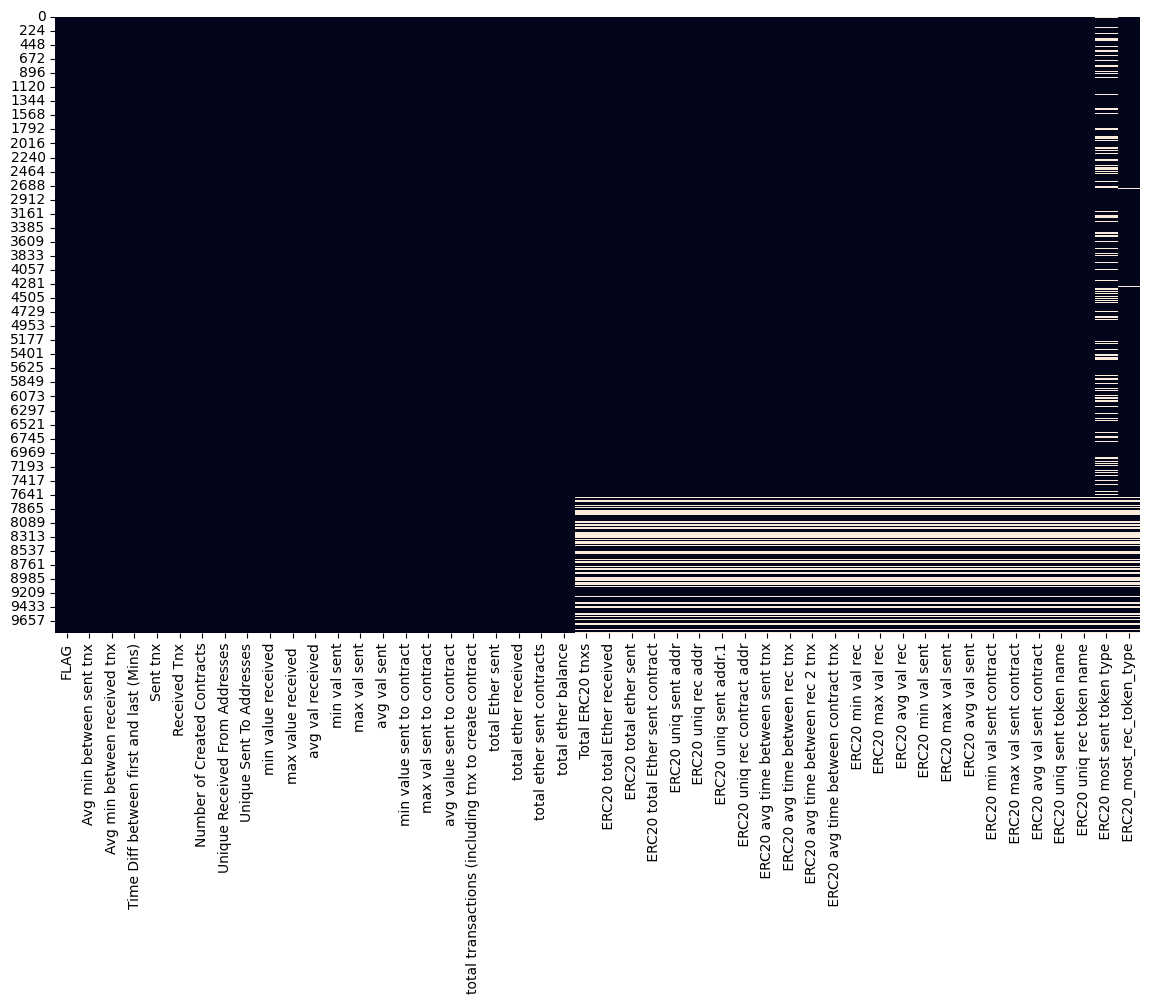

In [10]:
# Visualize missing values
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [11]:
# Drop Categorical Features
df.drop(list(categories), axis=1, inplace=True)

# Replace missing values with mean
df.fillna(df.median(), inplace=True)

# Drop features with 0 variance
zero_var_features = df.var() == 0
df.drop(df.var()[zero_var_features].index, axis=1, inplace=True)

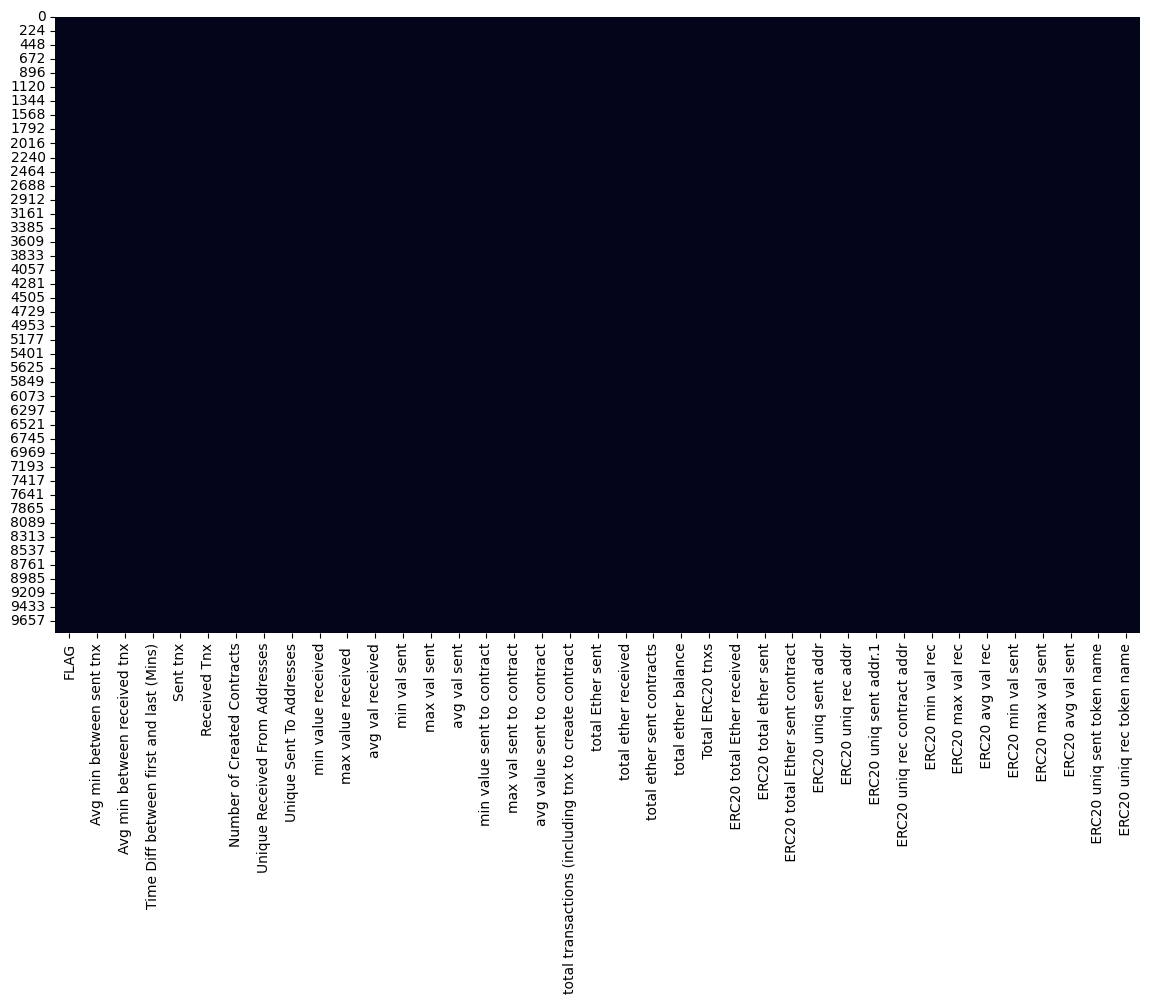

In [12]:
# Visualize missing values
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

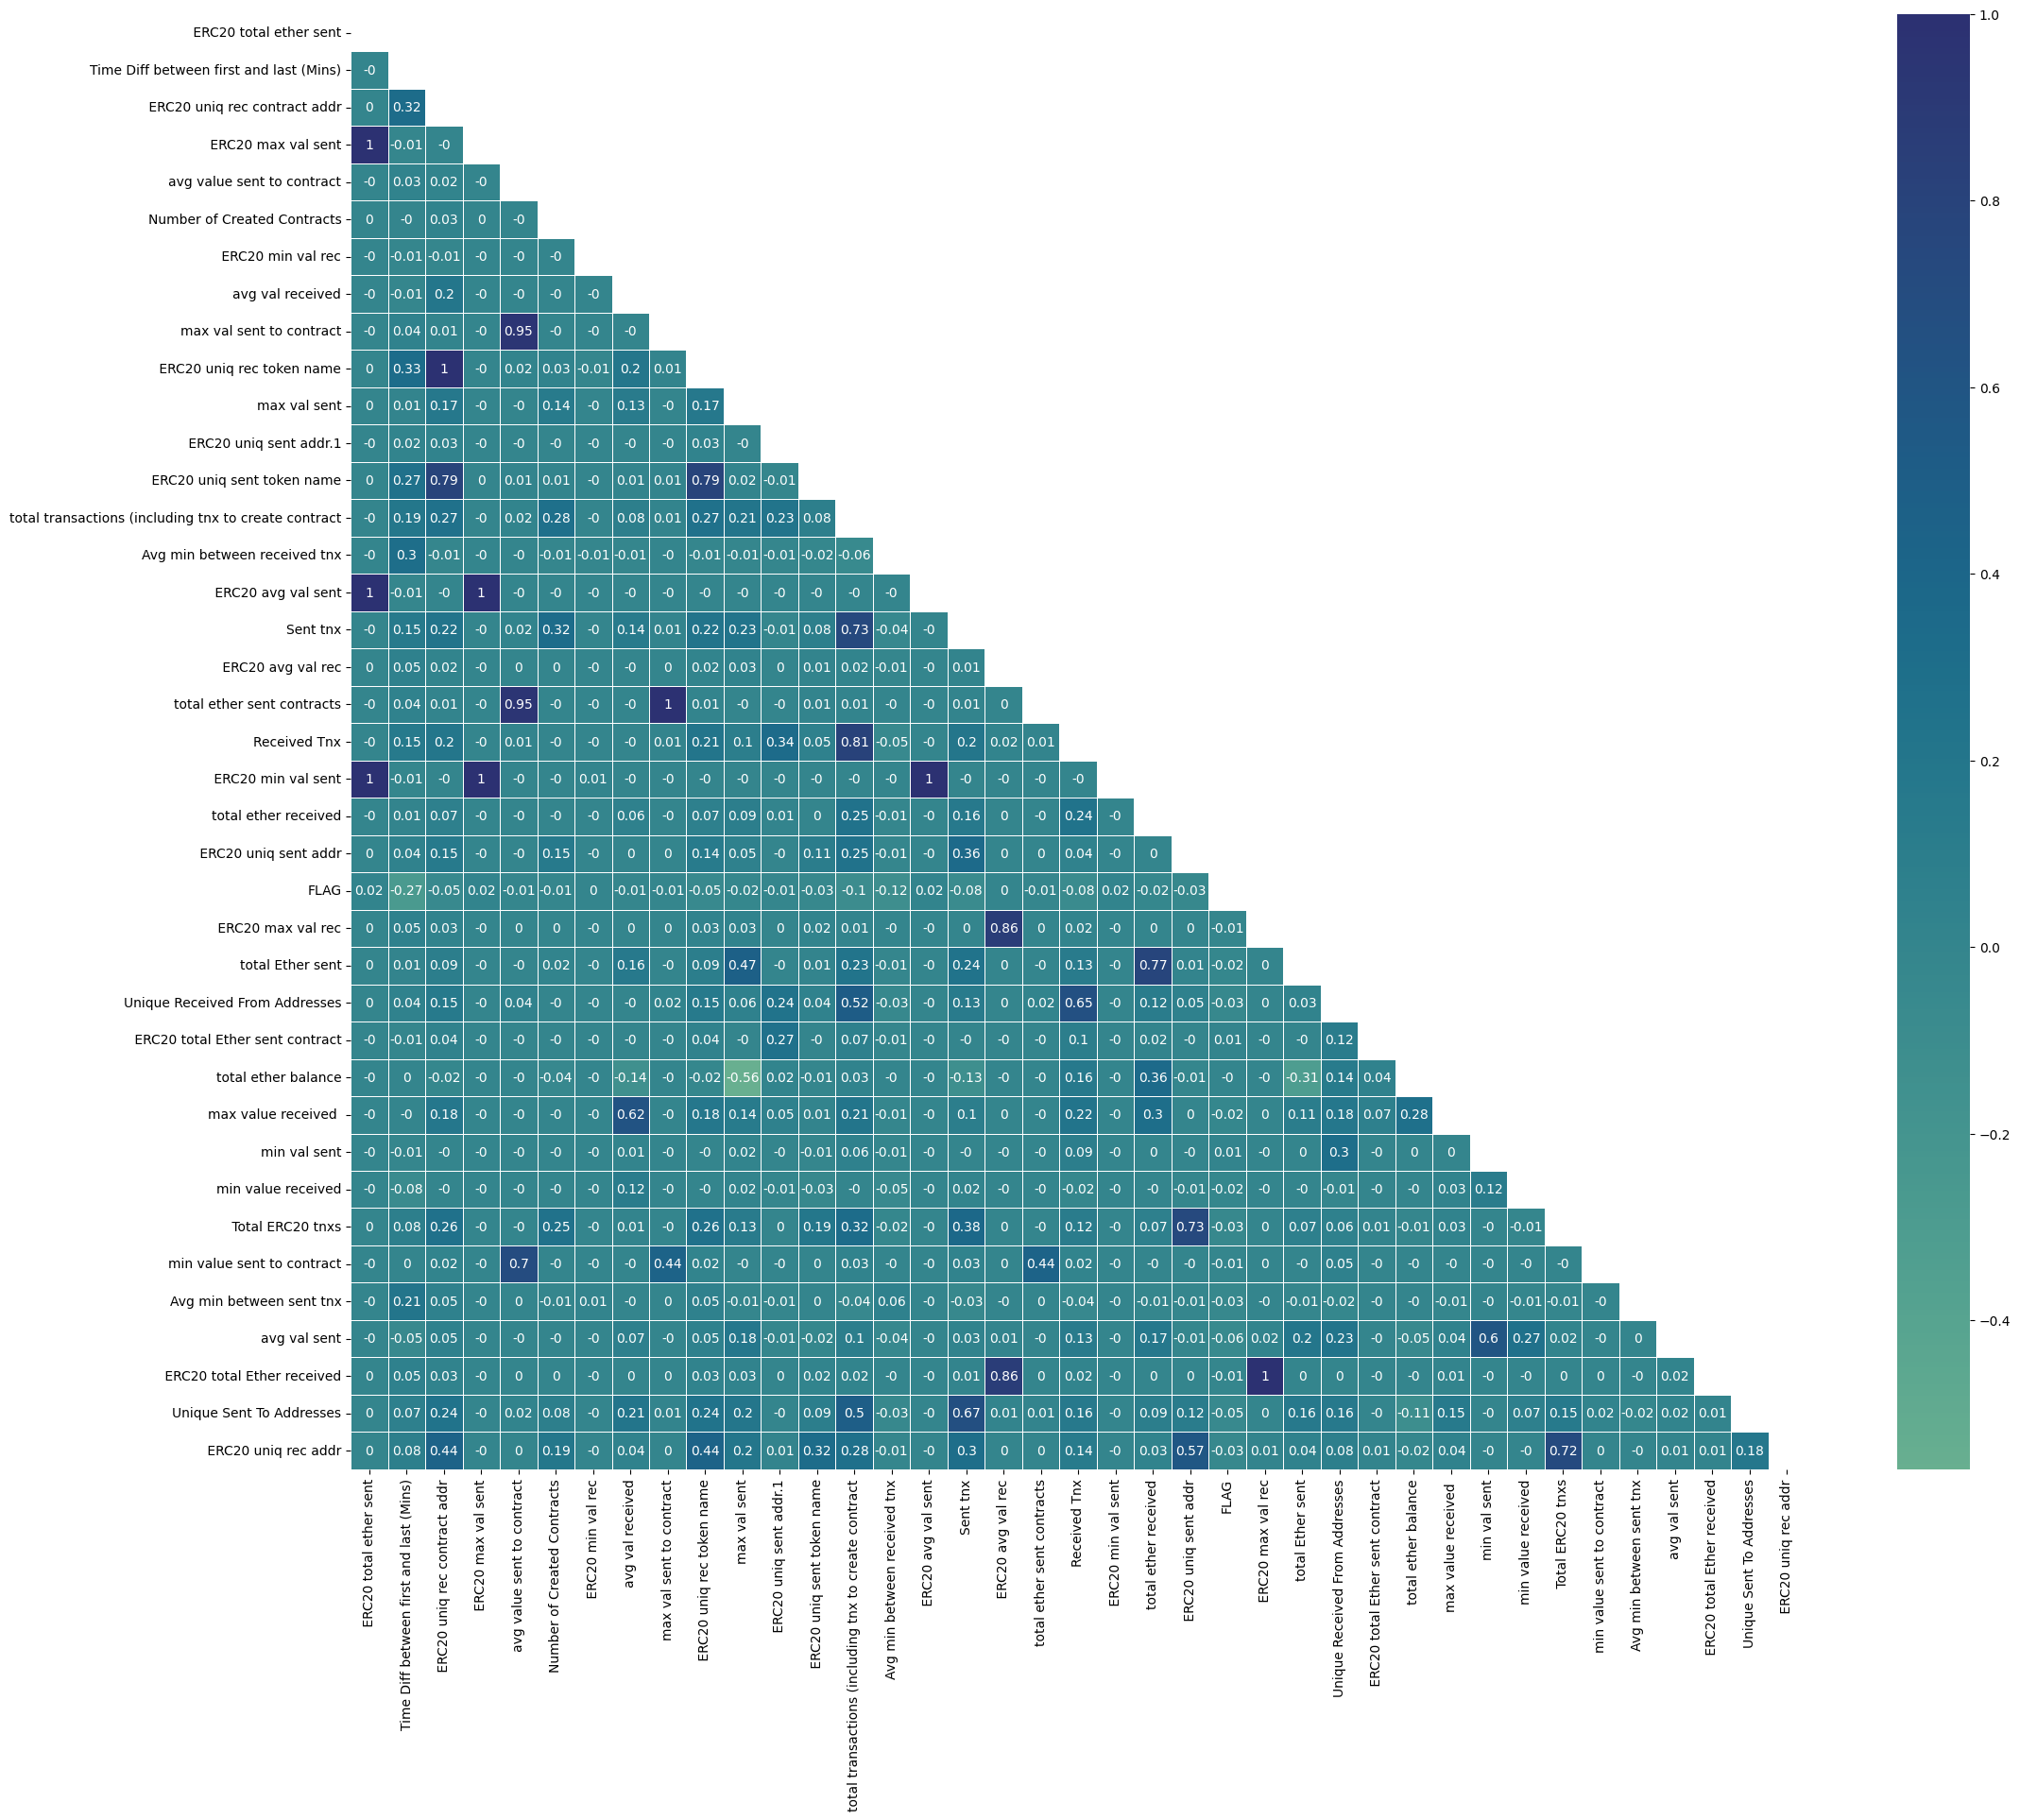

In [13]:
feature_list = list(set(df.columns) - set(['Address']))

corr_matrix = df[list(set(feature_list))].corr().round(2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(25, 20))
sns.heatmap(data=corr_matrix, mask=mask, square=True, annot=True, cmap="crest", center=0, linewidth=.5)
plt.show()

In [14]:
corr_threshold = 0.7
boolean_mask = mask.astype(bool)
red_corr_matrix = corr_matrix.mask(boolean_mask)
corr_matrix_unstacked = red_corr_matrix.unstack()
similar_features = corr_matrix_unstacked[abs(corr_matrix_unstacked) >= corr_threshold].reset_index().rename(columns={'level_0': 'feature_1', 'level_1': 'feature_2', 0: 'Absolute Correlation'})
similar_features.sort_values(by="Absolute Correlation",ascending=False)

,feature_1,feature_2,Absolute Correlation
0,ERC20 total ether sent,ERC20 max val sent,1.00
6,ERC20 max val sent,ERC20 min val sent,1.00
19,ERC20 max val rec,ERC20 total Ether received,1.00
14,ERC20 avg val sent,ERC20 min val sent,1.00
1,ERC20 total ether sent,ERC20 avg val sent,1.00
10,max val sent to contract,total ether sent contracts,1.00
5,ERC20 max val sent,ERC20 avg val sent,1.00
3,ERC20 uniq rec contract addr,ERC20 uniq rec token name,1.00
2,ERC20 total ether sent,ERC20 min val sent,1.00
7,avg value sent to contract,max val sent to contract,0.95


In [15]:
high_corr_feature_list = ['ERC20 uniq rec token name','ERC20 uniq rec contract addr','max val sent to contract',
                         'total ether sent contracts', 'ERC20 avg val sent', 'ERC20 min val sent',
                         'ERC20 max val sent', 'ERC20 total ether sent', 'ERC20 total Ether received',
                         'ERC20 max val rec', 'avg value sent to contract', 'ERC20 avg val rec',
                         'total transactions (including tnx to create contract', 'Received Tnx', 'ERC20 uniq sent token name',
                         'total ether received', 'total Ether sent', 'Total ERC20 tnxs',
                         'ERC20 uniq sent addr', 'Sent tnx', 'ERC20 uniq rec addr', 'min value sent to contract']

df.columns = df.columns.str.strip()
df.drop(high_corr_feature_list, axis=1, inplace=True)

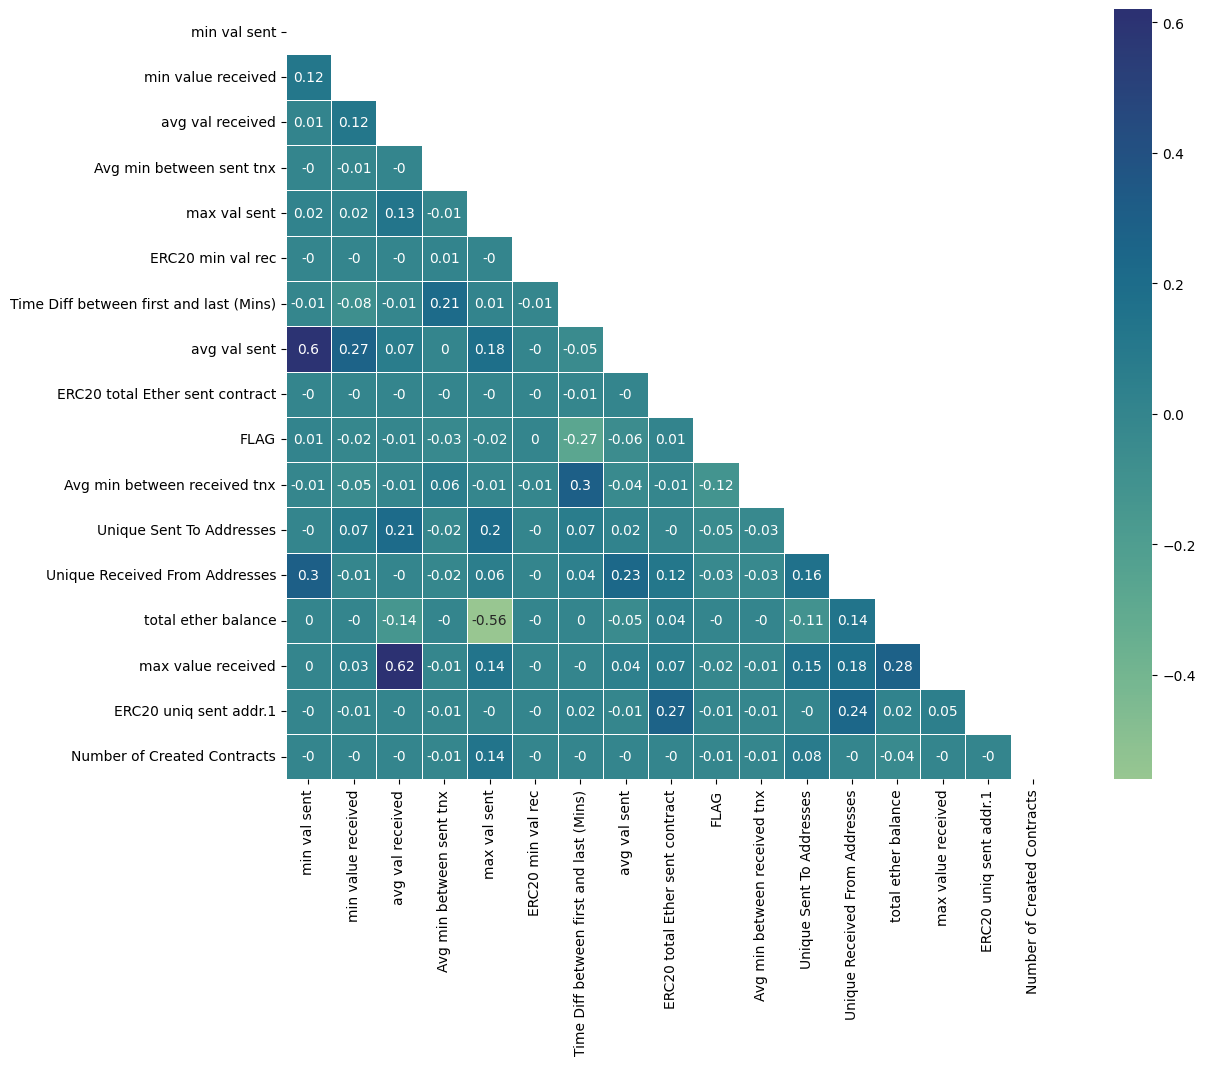

In [16]:
feature_list = list(set(df.columns))
corr_matrix = df[list(set(feature_list))].corr().round(2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr_matrix, mask=mask, square=True, annot=True, cmap="crest", center=0, linewidth=.5)
plt.show()

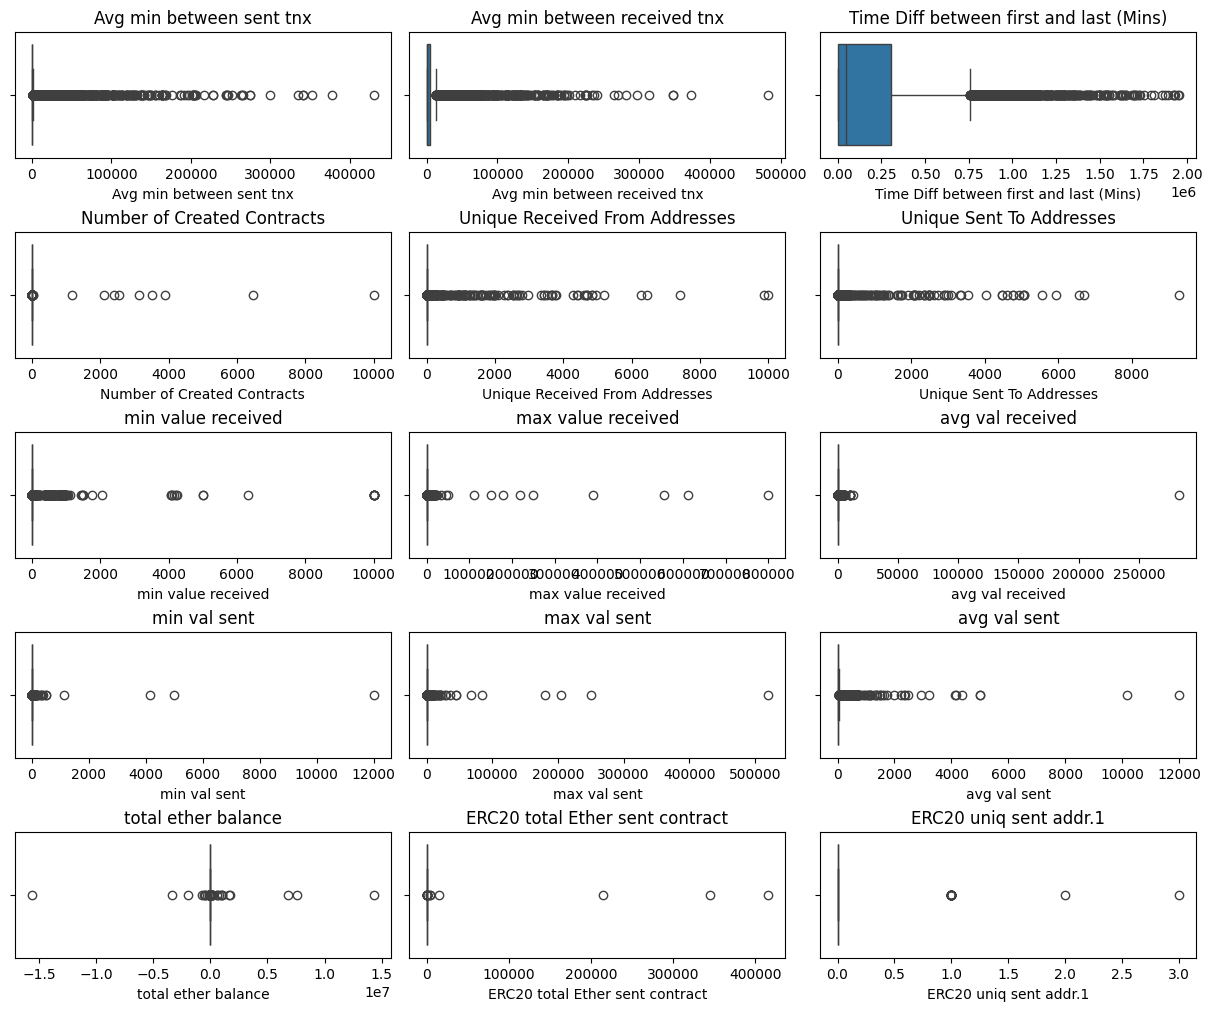

In [17]:
# Distribution of features
columns = df.columns

fig, axes = plt.subplots(5, 3, figsize=(12,10), constrained_layout =True)

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'{columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'{columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'{columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'{columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'{columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'{columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'{columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'{columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'{columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'{columns[10]}')

ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'{columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'{columns[12]}')

ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax12.set_title(f'{columns[13]}')

ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'{columns[14]}')

ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'{columns[15]}')

plt.show()

In [18]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f"Feature '{i}' has the following distribution: \n{df[i].value_counts()}")

Feature 'ERC20 uniq sent addr.1' has the following distribution: 
ERC20 uniq sent addr.1
0.0    9788
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64


In [19]:
df.drop(['ERC20 uniq sent addr.1'], axis=1, inplace=True)

FLAG
0    7637
1    2179
Name: count, dtype: int64


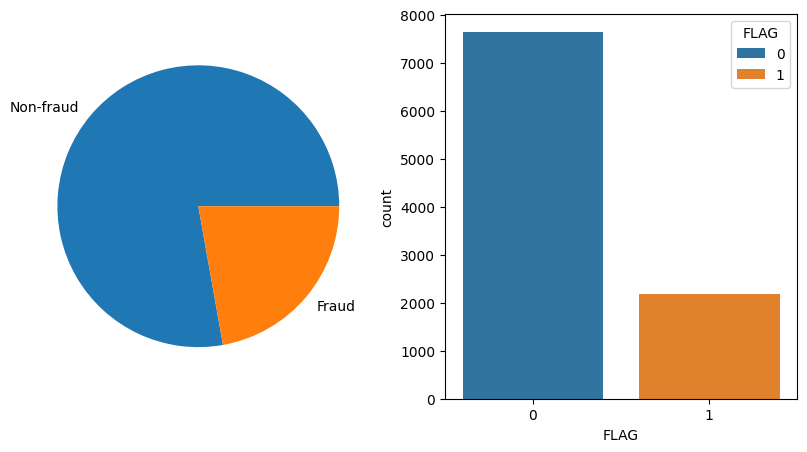

In [20]:
print(df['FLAG'].value_counts())

# Target Distribution
labels = ['Non-fraud', 'Fraud']

fig, ax = plt.subplots(1, 2, figsize=[10,5])
ax[0].pie(x=df['FLAG'].value_counts(), labels=labels)

sns.countplot(data=df, x='FLAG', hue='FLAG', palette=['#1f77b4', '#ff7f0e'], dodge=False)
plt.show()

In [21]:
df.insert(0, 'Address', add)

In [22]:
df.to_csv('/content/drive/MyDrive/ethereum-fraud-detection/processed-data/cleaned-kaggle-data.csv')